## PyTorch Workflow

Let´s explore an example of a Pytorch end-to-end workflow.


In [1]:
what_we_are_covering = {1: "data(preparing and loading)",
                        2: "Build model",
                        3: "Fitting the model to data (training)",
                        4: "Making predictions and evaluating a model (iference)",
                        5: "Saving and loading a model",
                        6: "Putting it all together"}

what_we_are_covering

{1: 'data(preparing and loading)',
 2: 'Build model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating a model (iference)',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of Pytorch´s building block for Neural Networks
import matplotlib.pyplot as plt

# Check Python version
torch.__version__

'2.1.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything in ML

* Spreadsheets (rows and cols)
* Images of any kind
* Videos
* Audio like songs
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numbers
2. Build a model to learn patterns in that numerical representation.

Lt´s create some *known* data using the linear regression formula.

We´ll use a linear regression formula to make a line with known **params**.

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
# unsqueeze needed for the models and adds a dimension in dimension 1
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let´s split into training and testing set

In [5]:
# Create a train/test split
train_split = int(0.8*len(X)) # 80%

X_train, y_train,  = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

"Visualize, visualize, visualize"

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training and test data, compares with predictions
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training records")
  plt.scatter(test_data, test_labels, c="r", label="Testing records", marker="^")

  # Are there predictions
  if predictions != None:
    plt.scatter(test_data, predictions, c="g", label="Predictions", marker="2")

  # Show legends
  plt.legend(prop={"size": 14});

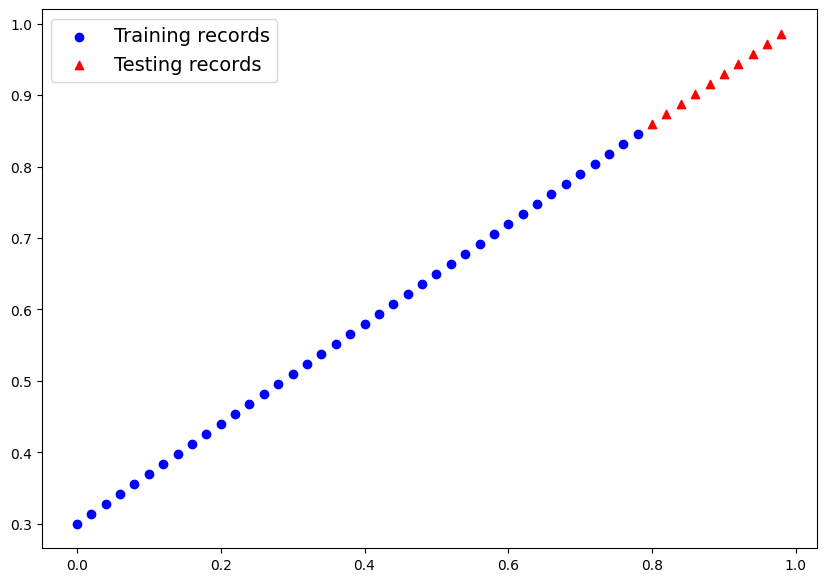

In [7]:
plot_predictions();

## 2. Building our Model

Our first Pytorch model:

* Starts with random values for weights and bias
* Look at data and adjust the random values to better represent (or get closer) to the ideal values of the parameters (weights and bias)

How?
* Through GD and backpropagation

In [8]:
from torch import nn
# Create a linar regression model class
class LinearRegressionModel(nn.Module):
  # almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # Since we know the parameters and this is a simple dataset
    # requires_grad = Gradient descent
    # torch.randn starts with random weights and updates from there
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  # Forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias # Linear regression formula

### Pytorch model building essentials

* torch.nn - contains all of the block for computational graphs (a nn can be considered a computatinal graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all NN modules, if you sublass it, you should overwrite forward()

* torch.optim - where the optimizers live

* def forward() - all nn.Module subclasses are required you to overwrite forward(). Defines what happens in forward propagation.

### Checking the content of our model

Let´s see whats inside.

We can check our model parameters by using '.parameters'

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model we created
model_0 = LinearRegressionModel()

# Check the params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'

To check our model´s predictive power, let´s see how well it predicts y_test based on X_test

When we pass data through our model, it wil run it through the forward method.

In [12]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [14]:
# Make predictions with the model
with torch.inference_mode():
  y_preds = model_0(X_test)
# https://twitter.com/PyTorch/status/1437838231505096708?lang=en
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
.3367 * .8000 + .1288

0.39815999999999996

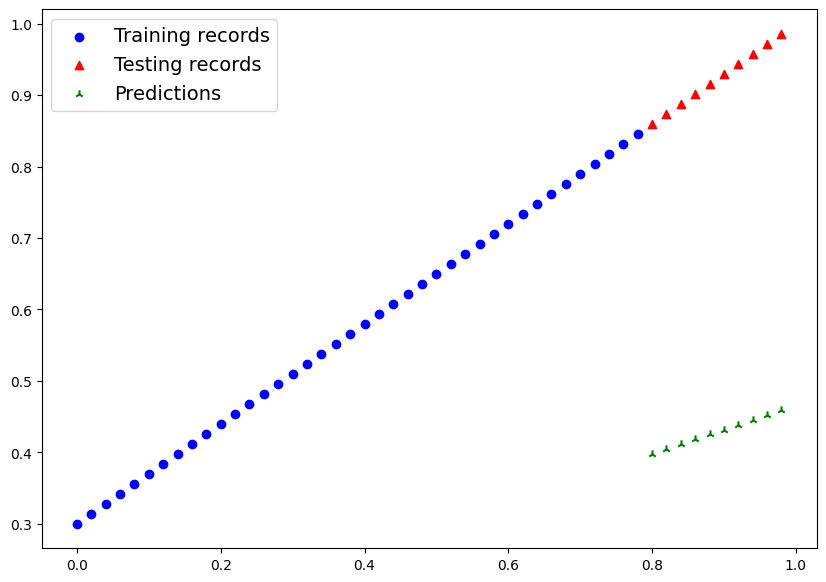

In [16]:
plot_predictions(predictions=y_preds)

## 3. Training a model

And try to improve our parameters to better adjust and make better predictions - not stay random basically.

One way to measure how poor our model is, is to use a loss function:

> https://pytorch.org/docs/stable/nn.html#loss-functions


We need:

* **A loss** function
* **An optimizer** to adjust the model´s parameters to improve the loss function (making it smaller)

> https://pytorch.org/docs/stable/optim.html

For Pytorch
* A training loop
* A testing loop


In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
from torch import nn

In [19]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Optimizer setup (SGD)
# Inside the optimizer you will typically need to insert parameters and the learning rate to try
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            # Learning rate
                            lr=0.01)

### Building a training loop in Pytorch and a Testing Loop

A couple of things we need on a training loop:

0. Loop though the data
1. Forward pass (involves data moving through our model´s functions) to make predictions on data - forward propagation
2. Calculate the loss (compare forward pass predictions to truth labels)
3. Optimize zero grad
4. Loss backward - move backwards (**back propagaiton**)
5. Optimizer step - use the optimizer to adjust our model´s parameters to try and improve the loss (**gradient descent**)



In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Run the following loss to see the loss adjustment and the parameters in real time

In [21]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter because we set it ourselves)
epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):

  # Set model to training mode
  model_0.train() # Sets all params that require gradient to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss on training since we are training
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5 Step the optimizer
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode(): # Turns off gradient tracking not needed in testing (dropout)
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # What´s happening?
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Trai Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Trai Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Trai Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Trai Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Trai Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Trai Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Trai Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Trai Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor(

In [22]:
weight, bias

(0.7, 0.3)

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

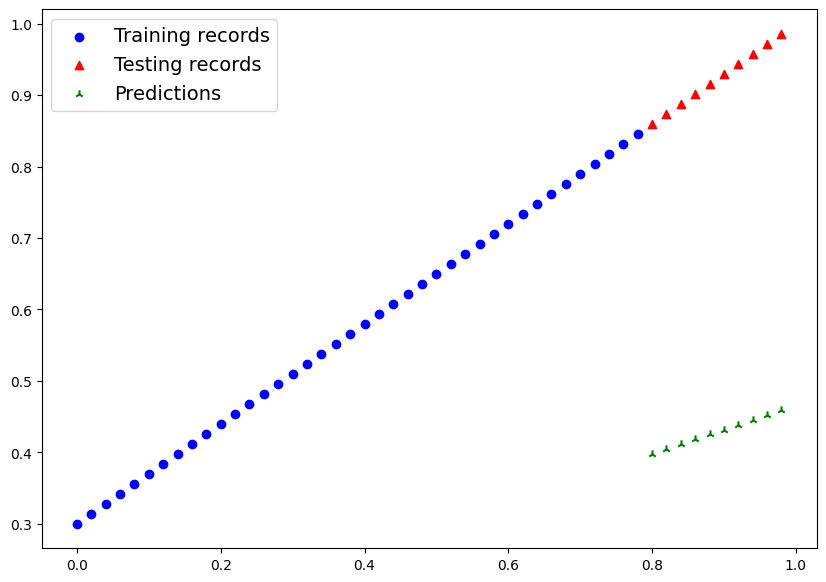

In [24]:
plot_predictions(predictions=y_preds)

In [25]:
# New predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

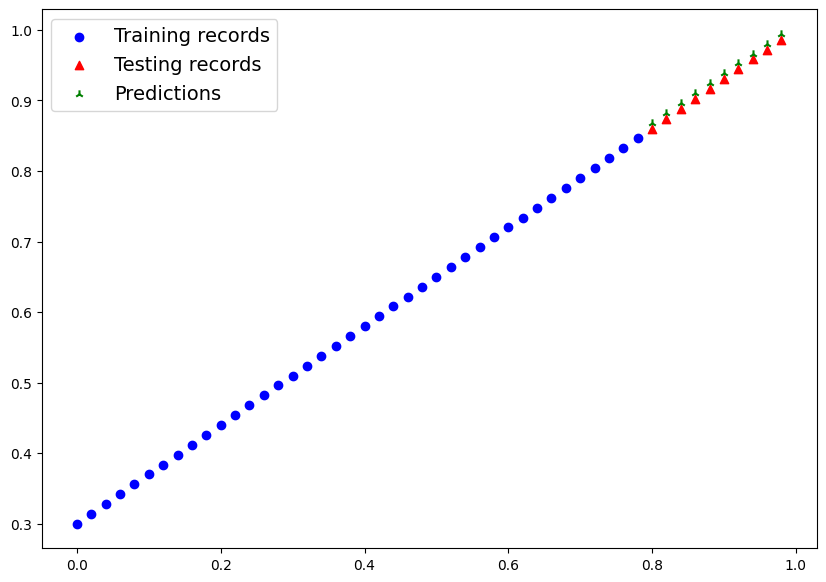

In [27]:
plot_predictions(predictions=y_preds_new)

In [28]:
import torch
import numpy as np

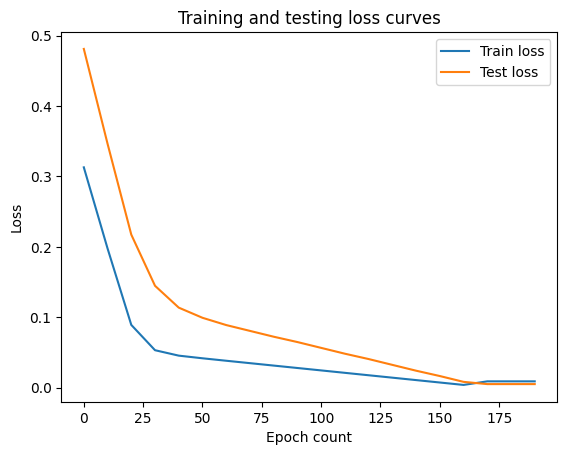

In [29]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch count")
plt.legend();

## Saving a model in Pytorch

There are 3 main methods we should know about for saving and loading models in Pytorch.

1. `torch.save()` - allows you to save a Pytorch object in pickle format
2. `torch.load()` - allows you to load a saved Pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model´s saved state dictionary


https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# Saving our model
from pathlib import Path

# Create models dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}...")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth...


## Loading a Pytorch model

Since we´ve saved the model´s state_dict rather than the entire model, we´ll create a new instance of our model class and load the saved params

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [33]:
# To load in a saved state dict, we must instantiate a new instance of our models class
loaded_model_0 = LinearRegressionModel()

# Load the same params of model 0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [34]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# Make predicictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [36]:
# compare preds with original preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together


In [1]:
# import pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.1.0+cu121'

Creating device agnostic code

Ig no GPU available, the code will default to CPU

In [2]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using {device}")

Using cuda


In [4]:
!nvidia-smi

Sat Mar  9 19:04:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data

In [6]:
# Create some data using the linear regression formula of y = wx + b
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
# Splitting the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

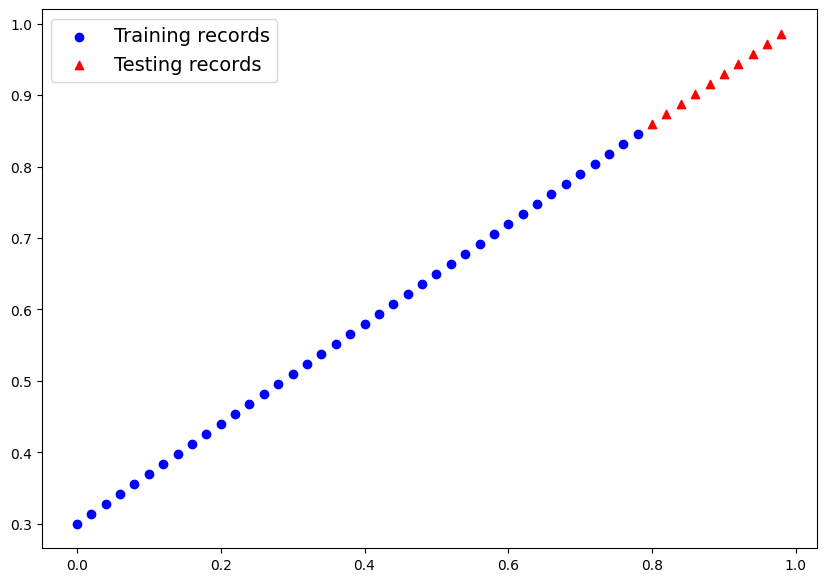

In [11]:
# Plot the data
# Note: load the plot_predictions()
plot_predictions(X_train, y_train, X_test, y_test);

## Building a Pytorch linear model



In [27]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [28]:
device

'cuda'

In [29]:
next(model_1.parameters()).device

device(type='cpu')

In [30]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [31]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### Training

We need:
* A loss function
* An optimizer
* A training and testing loop

In [32]:
# Setup the loss function
loss_fn = nn.L1Loss()
# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [33]:
# Let´s write a training loop
torch.manual_seed(42)
epochs = 200
# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  # Forward pass
  y_pred = model_1(X_train)
  # Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Perform backpropagation
  loss.backward()
  # Optimizer step
  optimizer.step()
  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  # Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Training loss: {loss}, Testing loss: {test_loss}")

Epoch: 0, Training loss: 0.5551779866218567, Testing loss: 0.5739762187004089
Epoch: 10, Training loss: 0.439968079328537, Testing loss: 0.4392664134502411
Epoch: 20, Training loss: 0.3247582018375397, Testing loss: 0.30455657839775085
Epoch: 30, Training loss: 0.20954833924770355, Testing loss: 0.16984669864177704
Epoch: 40, Training loss: 0.09433845430612564, Testing loss: 0.03513690456748009
Epoch: 50, Training loss: 0.023886388167738914, Testing loss: 0.04784907028079033
Epoch: 60, Training loss: 0.019956795498728752, Testing loss: 0.045803118497133255
Epoch: 70, Training loss: 0.016517987474799156, Testing loss: 0.037530567497015
Epoch: 80, Training loss: 0.013089174404740334, Testing loss: 0.02994490973651409
Epoch: 90, Training loss: 0.009653178043663502, Testing loss: 0.02167237363755703
Epoch: 100, Training loss: 0.006215683650225401, Testing loss: 0.014086711220443249
Epoch: 110, Training loss: 0.00278724217787385, Testing loss: 0.005814164876937866
Epoch: 120, Training loss:

In [34]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [35]:
weight, bias

(0.7, 0.3)

### Making and evaluating predictions

In [36]:
# Turn the model into evaluation model
model_1.eval()
# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

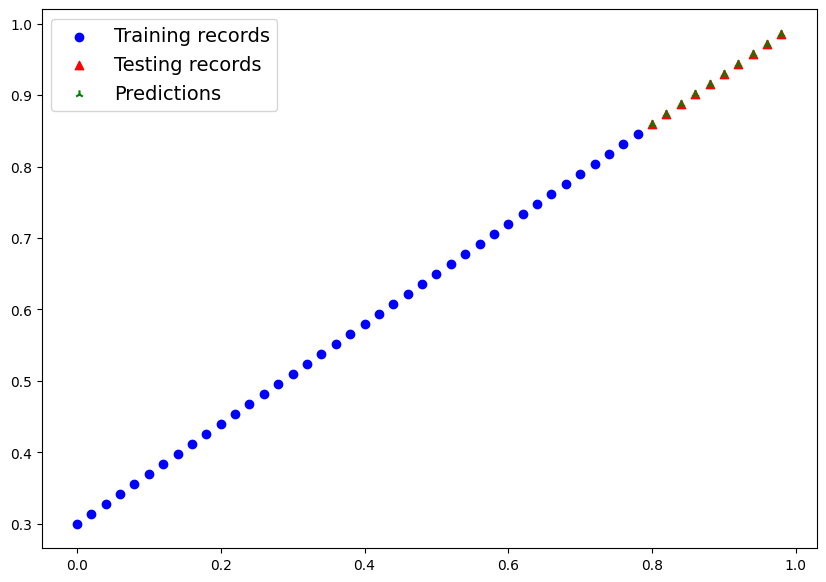

In [37]:
# Plot predictions
plot_predictions(predictions=y_preds.cpu())

## Saving and loading a trained model

In [40]:
from pathlib import Path

# Create a models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# SAve the model state dict
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [42]:
# Load a Pytorch model

# Create a new instance of linear regresion
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the target loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [43]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [44]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])